In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Helth_insurence_data\\insurance.csv")

In [3]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
data['sex']=data['sex'].map({'female':1,'male':0})


In [7]:
data['smoker']=data['smoker'].map({'yes':1,'no':0})

In [8]:
data['region']=data['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

In [9]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,2,10600.54830
1334,18,1,31.920,0,0,3,2205.98080
1335,18,1,36.850,0,0,1,1629.83350
1336,21,1,25.800,0,0,0,2007.94500


In [10]:
import seaborn as sns

C:\Users\Gourav Bairagi\AppData\Local\Temp\ipykernel_6924\292395675.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, i + 1)


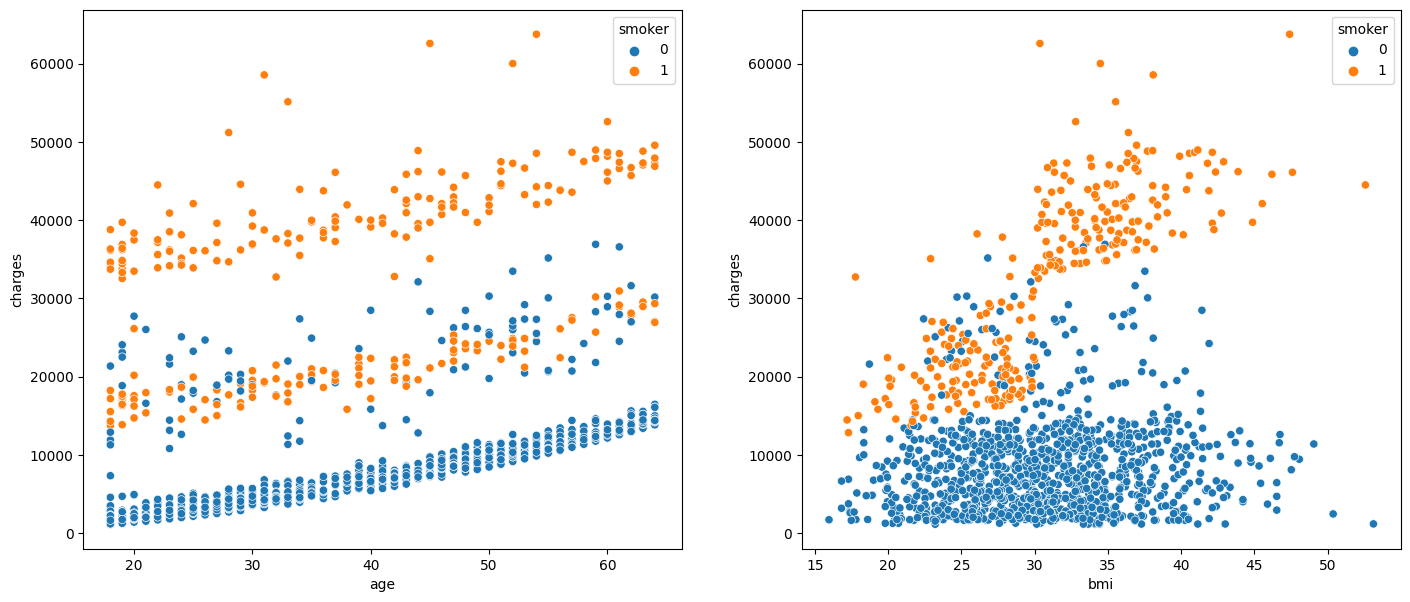

In [11]:
features = ['age', 'bmi']

plt.subplots(figsize=(17,7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=data, x=col,
				y='charges',
				hue='smoker')
plt.show()


C:\Users\Gourav Bairagi\AppData\Local\Temp\ipykernel_6924\3986755988.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, i + 1)


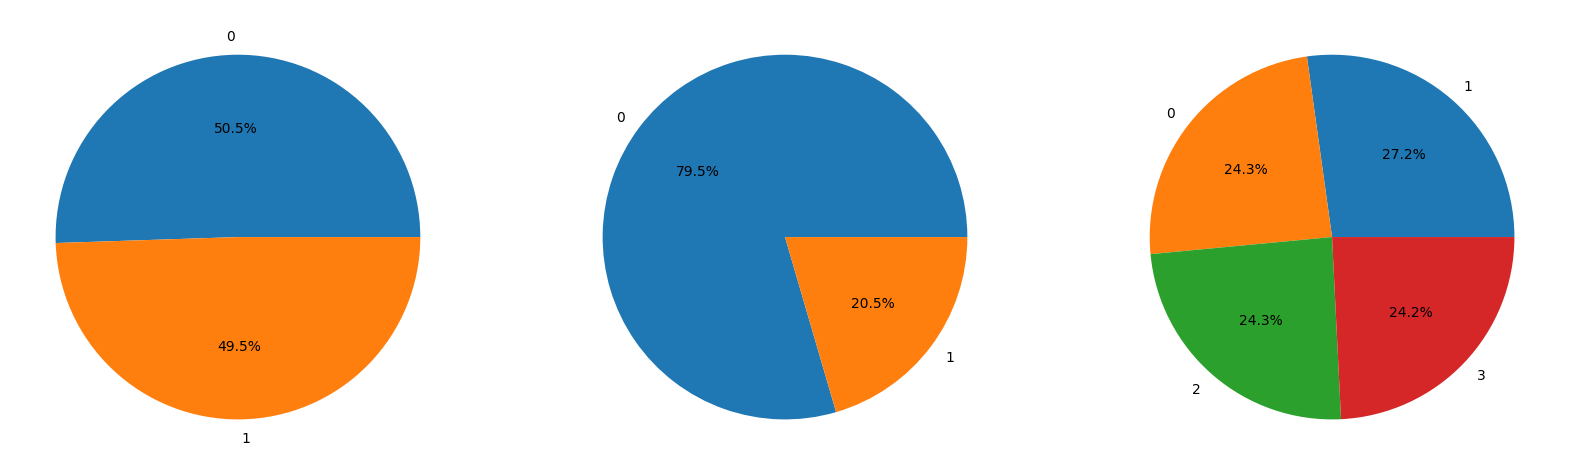

In [12]:
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = data[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()


C:\Users\Gourav Bairagi\AppData\Local\Temp\ipykernel_6924\870381865.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, k + 1)


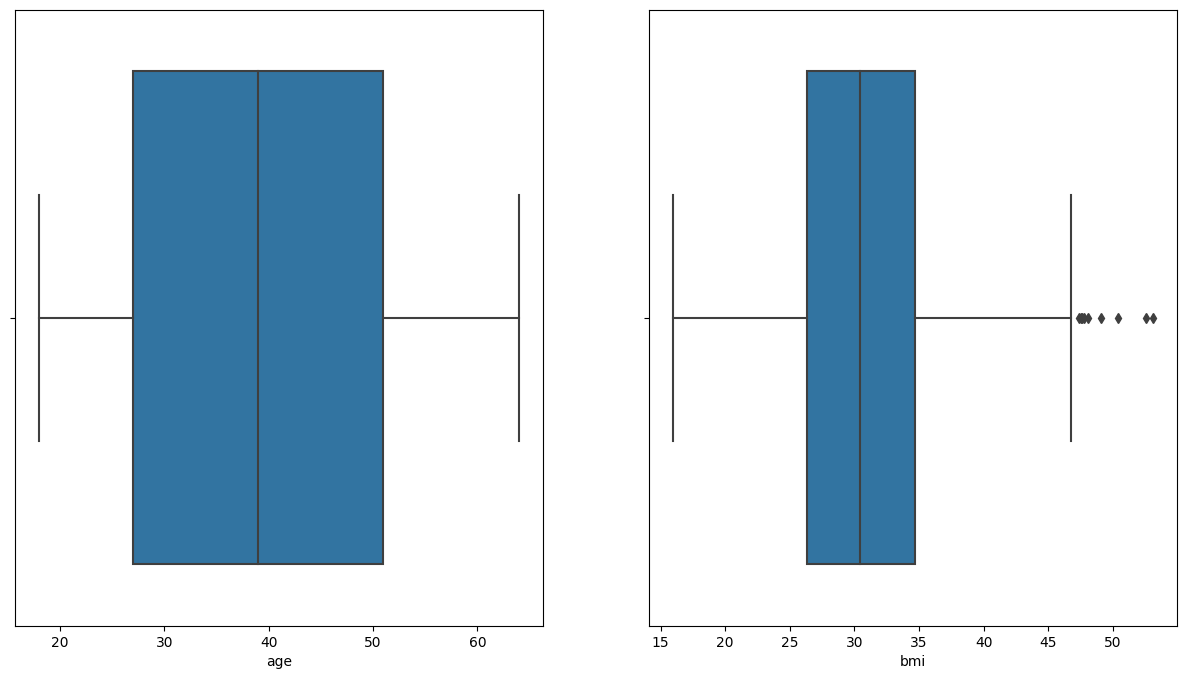

In [13]:
feature=['age','bmi']
fig,axs=plt.subplots(figsize=(15,8))
# axs=axs.flatten()
index=0
for k,v in enumerate(feature):
    plt.subplot(1, 2, k + 1)
    sns.boxplot(data=data,x=v)
    index+=1

<Axes: xlabel='bmi'>

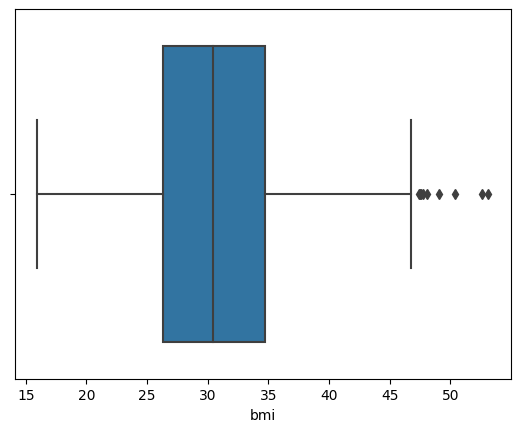

In [14]:
sns.boxplot(data=data,x='bmi')

In [15]:
q1=data['bmi'].quantile(0.25)
q3=data['bmi'].quantile(0.75)
iqr=q3-q1
low=q1-1.5*iqr
upp=q3+1.5*iqr
print(low)
print(upp)


13.7
47.290000000000006


<Axes: >

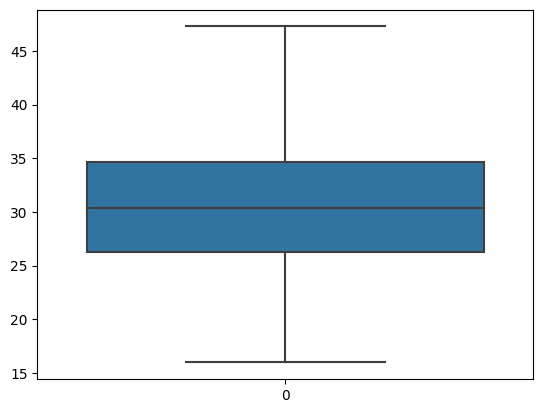

In [16]:
from feature_engine.outliers import ArbitraryOutlierCapper
cap=ArbitraryOutlierCapper(max_capping_dict={'bmi':47.2900},min_capping_dict={'bmi':13.7})
data[['bmi']]=cap.fit_transform(data[['bmi']])
sns.boxplot(data['bmi'])

In [17]:
X=data.drop(['charges'],axis=1)
Y=data[['charges']]
from sklearn.linear_model import LinearRegression,Lasso

from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
l1=[]
l2=[]
l3=[]
cvs=0
for i in range(40,50):
    xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)
    lrmodel=LinearRegression()
    lrmodel.fit(xtrain,ytrain)
    l1.append(lrmodel.score(xtrain,ytrain))
    l2.append(lrmodel.score(xtest,ytest))
    cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()
    l3.append(cvs)
df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})
df1


,train acc,test acc,cvs
0,0.754881,0.734172,0.74736
1,0.761972,0.683614,0.74736
2,0.742079,0.782405,0.74736
3,0.763527,0.694695,0.74736
4,0.749824,0.754531,0.74736
5,0.760433,0.703827,0.74736
6,0.746422,0.765850,0.74736
7,0.737704,0.799528,0.74736
8,0.749269,0.752695,0.74736
9,0.745913,0.767716,0.74736


In [18]:
from sklearn.metrics import r2_score

In [19]:
xgmodel=XGBRegressor()
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())


0.9962310637115709
0.8183991701416669
0.8095165975618517


In [20]:
from sklearn.model_selection import GridSearchCV
estimator=XGBRegressor()
param_grid={'n_estimators':[10,15,20,40,50],'max_depth':[3,4,5],'gamma':[0,0.15,0.3,0.5,1]}
grid=GridSearchCV(estimator,param_grid,scoring="r2",cv=5)
grid.fit(xtrain,ytrain)
print(grid.best_params_)


{'gamma': 0, 'max_depth': 3, 'n_estimators': 15}


In [21]:
xgmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
xgmodel.fit(xtrain,ytrain)
ypredtrain4=xgmodel.predict(xtrain)
ypredtest4=xgmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(xgmodel,X,Y,cv=5,).mean())

0.8793501302759765
0.8743454684830995
0.8623169663183192


In [22]:
data.drop(data[['sex','region']],axis=1,inplace=True)
Xf=data.drop(data[['charges']],axis=1)
X=data.drop(data[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


0.875728006196204
0.8832123271902537
0.8617088412874759


In [23]:
new_data=pd.DataFrame({'age':54,'sex':'female','bmi':51,'children':1,'smoker':'no','region':'southwest'},index=[0])
# new_data['sex']=new_data['sex'].map({'female':1,'male':0})
# new_data['sex']=new_data['sex'].map({'female':1,'male':0})
new_data['smoker']=new_data['smoker'].map({'yes':1,'no':0})
new_data=new_data.drop(new_data[['sex','region']],axis=1)

In [24]:
finalmodel.predict(new_data)

array([12821.704], dtype=float32)

In [25]:
new_data1=pd.DataFrame({'age':19,'sex':'male','bmi':27.9,'children':0,'smoker':'yes','region':'northeast'},index=[0])
new_data1['smoker']=new_data1['smoker'].map({'yes':1,'no':0})
new_data1=new_data1.drop(new_data1[['sex','region']],axis=1)
finalmodel.predict(new_data1)


array([18164.979], dtype=float32)